## Présentation générale du jeu de données
## Démarche méthodologique d’analyse de données 
## Synthèse de l’analyse de données

In [59]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [48]:
df = pd.read_csv("data/p2-arbres-fr.csv", delimiter=";", decimal=",")

### Analyse naive

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

On peut noter que les deux derniere colonnes geo point sont certainement des valeur numériques, il doit donc y avoir de mauvaise valeurs dans certaines lignes

renomons les colones puis vérifions le type des colonnes GEO_POINT

#### Renaming columns

In [41]:
dict_names = {}
for name in df.columns:
    new_name = name.lower().replace(" ", "_")
    dict_names[name] = new_name
df.rename(columns=dict_names, inplace=True)

#### changement du type de geo_point

In [62]:
df[["geo_point_2d_a", "geo_point_2d_b"]]= df[["geo_point_2d_a", "geo_point_2d_b"]].astype("Float64")

### Analyse univariée

In [63]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0000000000,48.8576199541,2.3209621099
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.8576560697,2.3210314229
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.8577050069,2.3210605660
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.8577220449,2.3210058253
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.8904352883,2.3152894588


#### Affichage des valeurs nulles en barplot

<Figure size 1000x600 with 0 Axes>

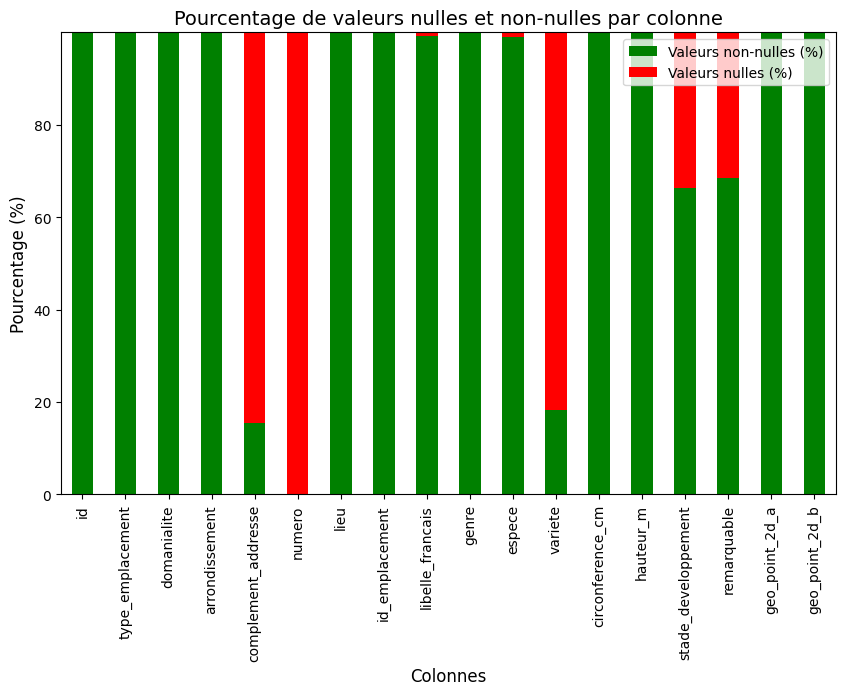

In [43]:

import matplotlib.pyplot as plt

# Supposons que df soit ton DataFrame

# Calculer le pourcentage de valeurs nulles et non-nulles par colonne
pourcentage_null = (df.isnull().sum() / len(df)) * 100
pourcentage_non_null = 100 - pourcentage_null

# Créer un DataFrame avec les deux pourcentages
pourcentage_df = pd.DataFrame({
    'Valeurs nulles (%)': pourcentage_null,
    'Valeurs non-nulles (%)': pourcentage_non_null
})

# Créer un graphique en barres empilées
plt.figure(figsize=(10, 6))
pourcentage_df[['Valeurs non-nulles (%)', 'Valeurs nulles (%)']].plot(
    kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

# Ajouter des labels et un titre
plt.title('Pourcentage de valeurs nulles et non-nulles par colonne', fontsize=14)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)

# Afficher la légende et le graphique
plt.legend(loc='upper right')
plt.show()


On peut déja conclure de la colonne “numero” ne va pas nous servir car elle ne contient aucune information. De meme pour “complement adresse” ou “variete” 

on retire ces 3 colonnes 

In [44]:
df.drop(columns=["numero","complement_addresse", "variete"], inplace=True)

#### Analyse des colonnes numériques

In [45]:
df_number = df.select_dtypes(include=["number"])

,id,circonference_cm,hauteur_m,remarquable
0,99874,20,5,0.0
1,99875,65,8,NaN
2,99876,90,10,NaN
3,99877,60,8,NaN
4,99878,38,0,NaN
...,...,...,...,...
200132,2024741,0,0,0.0
200133,2024742,0,0,0.0
200134,2024743,0,0,0.0
200135,2024744,0,0,0.0


### Cheking dataset info

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

#### Columns with Null Values
##### 2 000 137 raws  

- numero               0 non-null

- complement_addresse  30902 non-null

- libelle_francais     198640 non-null

- genre                200121 non-null

- espece               198385 non-null

- variete              36777 non-null

- stade_developpement  132932 non-null

- remarquable          137039 non-null

- domanialite          200136 non-null

In [57]:
null_col = []
for col in df.columns:
    if True in df[col].isnull().values:
        null_col.append(col)
        

In [62]:
x = df["domanialite"].isnull().values

In [81]:
total = len(df)
values, count = np.unique(x, return_counts=True)
r = dict(zip(values, count))
try:
    r[True]
except: 
    r[False]

200137

##### remove numero column because all values are missing 

In [47]:
df.drop(columns=["numero"], inplace=True)

In [50]:
df[null_col]

,domanialite,complement_addresse,libelle_francais,genre,espece,variete,stade_developpement,remarquable
0,Jardin,NaN,Marronnier,Aesculus,hippocastanum,NaN,NaN,0.0
1,Jardin,NaN,If,Taxus,baccata,NaN,A,NaN
2,Jardin,NaN,If,Taxus,baccata,NaN,A,NaN
3,Jardin,NaN,Erable,Acer,negundo,NaN,A,NaN
4,Jardin,NaN,Arbre à miel,Tetradium,daniellii,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
200132,Jardin,NaN,NaN,Castanea,fargesii,NaN,NaN,0.0
200133,Jardin,NaN,Arbre aux mouchoirs,Davidia,involucrata,NaN,NaN,0.0
200134,Jardin,NaN,Peuplier,Populus,simonii,NaN,NaN,0.0
200135,Jardin,NaN,Chêne,Quercus,n. sp.,NaN,NaN,0.0
